In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using “Test_Data.csv”*, please do the following:
1.	Extract columns ‘A’,‘B’,’C’,’G’,’R’,’X6’ and ’X8’ for different classes using dictionary and save as a csv for each class. 
2.	Do a complete EDA on each class file. 
3.	Build a classification model by using dimensionality reduction and feature selection techniques
4.	Create a ROC curve of the model. 


In [3]:
data=pd.read_csv("/home/learner/Downloads/Test_Data.csv")

In [8]:
data.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6,Class
0,0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,...,0.002757,-0.003582,0.000125,0.001961,-3.290000e-08,0.000346,0.000956,9.150000e-07,1.190000e-07,A
1,1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,...,0.002757,-0.002944,0.000131,0.001932,-3.290000e-08,0.000358,0.000888,7.880000e-07,1.280000e-07,A
2,2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,...,0.003168,-0.002944,0.000125,0.001628,-3.290000e-08,0.000339,0.000875,7.660000e-07,1.150000e-07,A
3,3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,...,0.003168,-0.002490,0.000116,0.001572,-3.290000e-08,0.000308,0.000856,7.330000e-07,9.480000e-08,A
4,4,6,823.44,759.75,879.71,28.98,72.96,68.20,78.97,2.56,...,0.003091,-0.002601,0.000126,0.001596,-3.290000e-08,0.000318,0.000913,8.330000e-07,1.010000e-07,A


In [10]:
columns=["A",'B','C','G','R','X6','X8']
data1=data[columns]
data1.head()

,A,B,C,G,R,X6,X8
0,6,860.62,809.73,65.24,573,88.1326,0.2113
1,7,871.58,789.74,64.54,849,84.8057,0.2151
2,6,854.87,789.74,64.54,687,90.5386,0.2127
3,7,823.73,759.75,68.20,475,86.1053,0.2081
4,6,823.44,759.75,68.20,424,87.0283,0.2429


In [257]:
for i in data1.columns:
    each_class=pd.DataFrame(data[i])
    each_class.to_csv("/home/learner/Downloads/predict.csv")

In [71]:
data1.isnull().sum()

A     0
B     0
C     0
G     0
R     0
X6    0
X8    0
dtype: int64

In [72]:
data1.describe()

,A,B,C,G,R,X6,X8
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000
mean,9.343895,881.419832,752.025270,62.020142,3171.634184,62.318427,0.225810
std,4.444193,193.896790,189.219045,15.884413,5822.432328,22.391364,0.058504
min,4.000000,372.080000,309.900000,37.510000,4.000000,4.166700,0.094400
25%,7.000000,728.480000,609.800000,50.020000,618.500000,45.640600,0.177400
50%,8.000000,879.710000,759.750000,58.270000,1490.000000,65.309200,0.217100
75%,9.000000,1039.650000,909.700000,69.790000,3574.500000,81.270800,0.263500
max,29.000000,1304.800000,1169.610000,142.900000,99096.000000,100.000000,0.362200


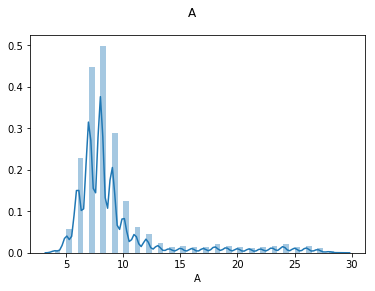

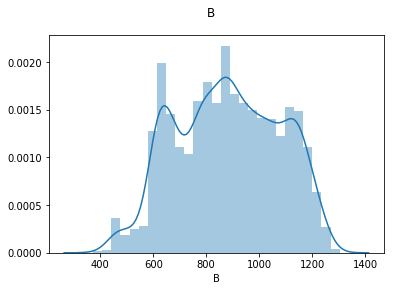

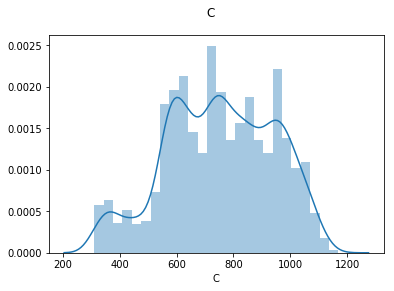

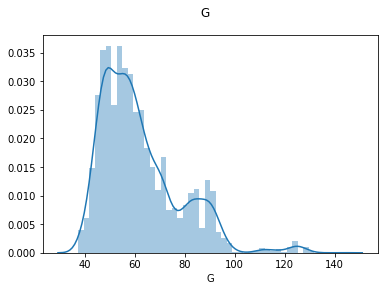

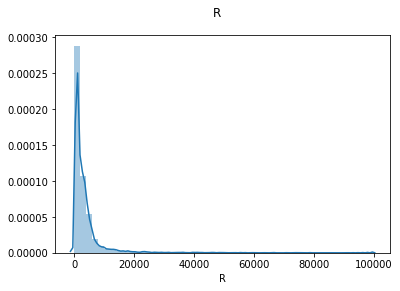

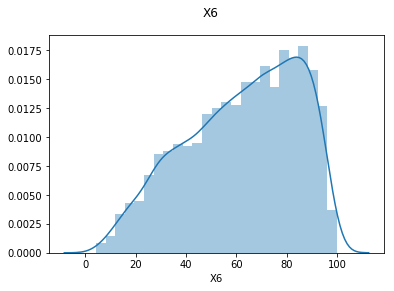

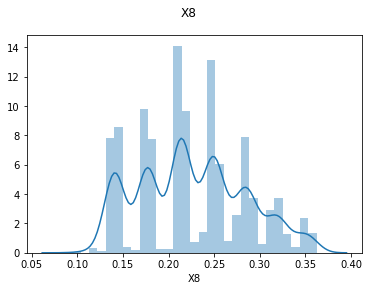

In [104]:
for i in data1.columns:
    fig = plt.figure()
    fig.suptitle(i)
    sns.distplot(data1[i])
    plt.show()

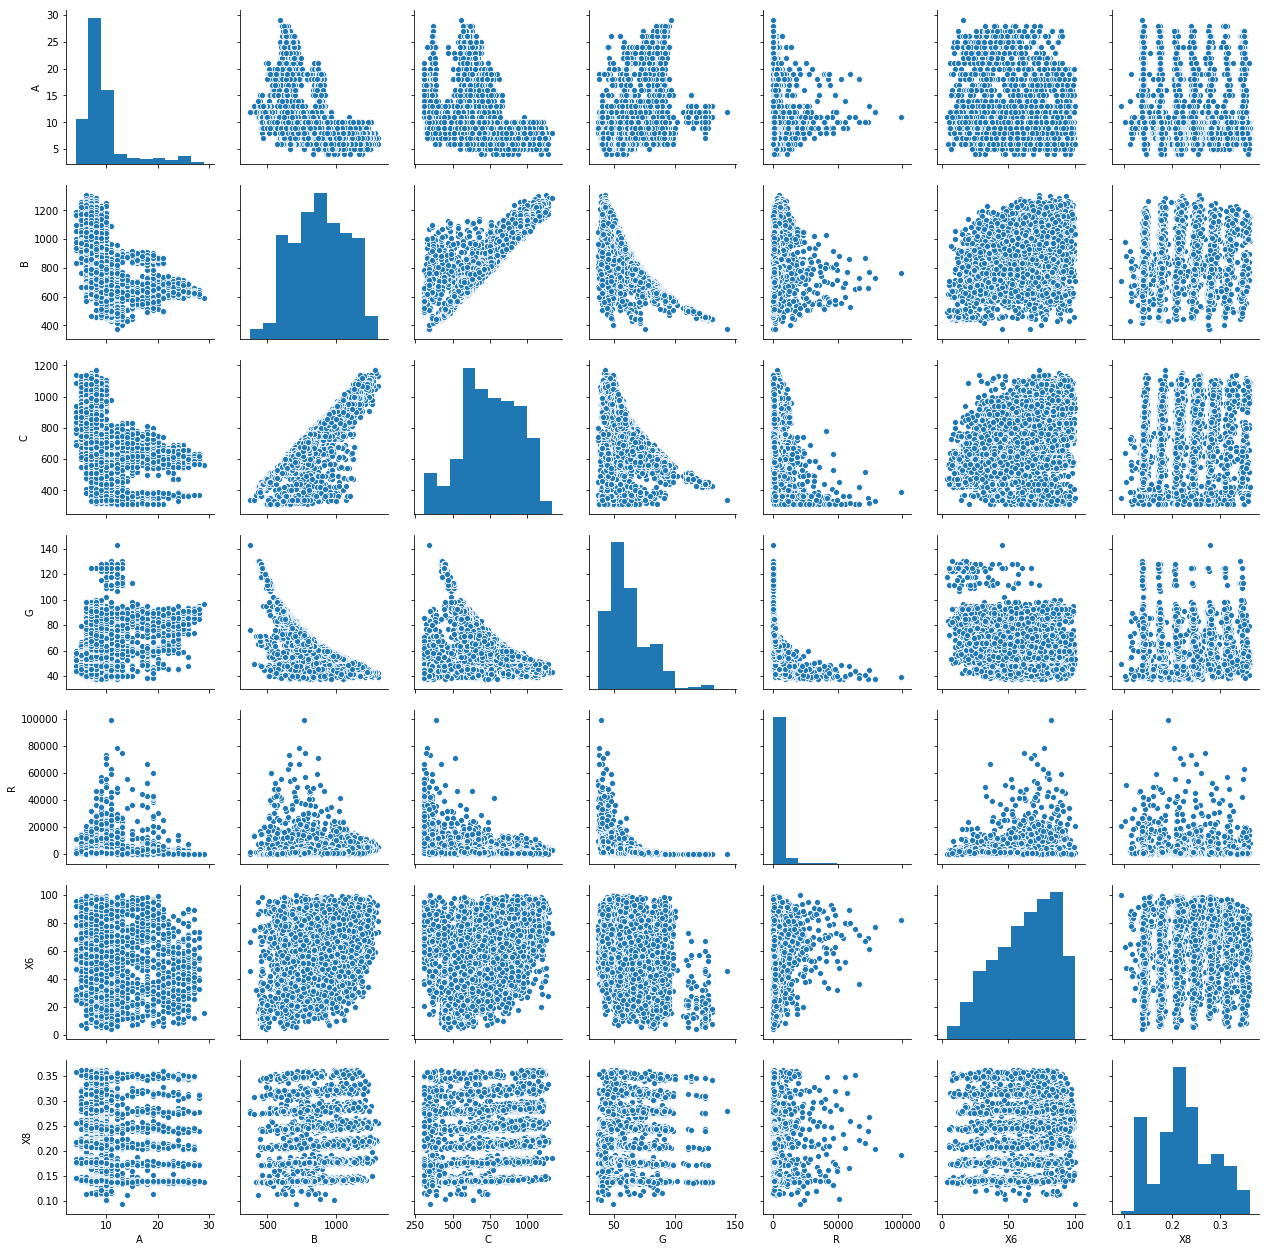

In [105]:
sns.pairplot(data1)

In [170]:
#Importing PCA and DecisionTreeClassifier libratry from sklearn
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

#Splitted Dependent and Independent Variables
X = data1.iloc[:, 0:].values
y = data1.iloc[:, 0].values

# initiate PCA and classifier
pca = PCA()
classifier = DecisionTreeClassifier()

# transform / fit
X_transformed = pca.fit_transform(X)
classifier.fit(X_transformed, y)

# predict "new" data

newdata = X

# transform new data using already fitted pca
# (don't re-fit the pca)
newdata_transformed = pca.transform(newdata)

# predict labels using the trained classifier

pred_labels = classifier.predict(newdata_transformed)



Text(0,0.5,'Cumulative  SUM')

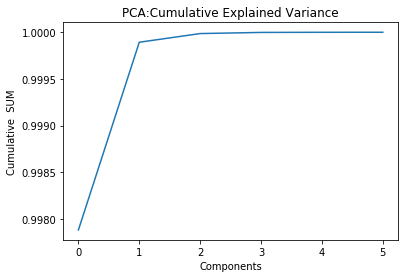

In [171]:
#Plotting the cumulative explained variance

plt.plot(explained_variance)
plt.title("PCA:Cumulative Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulative  SUM")

In [245]:
from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier on the transformed data
pipe = Pipeline([('pca', PCA()),('tree', DecisionTreeClassifier())])

pipe.fit(X, y)

predict=pipe.predict(newdata)
predict=pd.DataFrame(predict)
#save as csv file
predict.to_csv("/home/learner/Downloads/predict.csv")

In [173]:
print(classifier.feature_importances_)

[0.16675975 0.18876353 0.16627259 0.1641206  0.1493938  0.16468974]


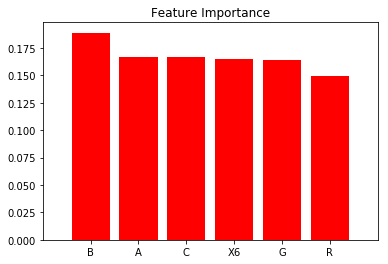

In [220]:
import scikitplot as skplt
skplt.estimators.plot_feature_importances(classifier,feature_names=[u'A', u'B', u'C', u'G', u'R', u'X6', u'X8'])